# Lab 9:  Autoencoders



![alt text](https://miro.medium.com/max/1700/1*I5MVGIrROrAnD3U_2Jm1Ng.png)





## Practice Instruction: Generate Random Handwriting Number

In this lab, you will learn do the generative model using autoencoder to generate random image.</br>

We will learn about How to use keras like fuctional api</br>
This is what fuctional api in keras: https://keras.io/getting-started/functional-api-guide/ // https://keras.io/models/model/ </br>
About the autoencoder: https://towardsdatascience.com/autoencoders-in-keras-c1f57b9a2fd7 /</br>


### Autoencoder Model

![alt text](https://blog.keras.io/img/ae/autoencoder_schema.jpg)


***Images from:<br>***
*1. <a href=https://blog.keras.io/building-autoencoders-in-keras.html> Keras Blog </a></br>*
*2. Manning - Deep Learning with Python Book*


In [1]:
# Import required libraries
import keras
from keras import models
from keras import layers
from keras import backend as K
from keras import callbacks

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.model_selection import train_test_split

%matplotlib inline

### Load MNIST data

In [2]:
# Load MNIST data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Data exploration: Shape
x_train.shape

(60000, 28, 28)

In [4]:
# Data exploration: Data type
x_train.dtype

dtype('uint8')

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Preprocess data

In [6]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_train = x_train/255.

x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_test = x_test/255.

In [7]:
# shape after preprocess
x_train.shape

(60000, 28, 28, 1)

### Split Train, Test, Validation data

In [8]:
# Split data
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,
                                                  test_size=0.1,
                                                  stratify=y_train,
                                                  random_state=0)

### Create autoencoder model

In technical terms, here’s how a AE works:
1. An encoder module turns the input samples input_img into  parameters

2. A decoder module maps this point in parameters back to the original input image.

In [9]:
# Encoder Model
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
# This returns a tensor
inputs = Input(shape=(28, 28,1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs) #28 x 28 x 32
x = MaxPooling2D((2, 2))(x) #14 x 14 x 32
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) #14 x 14 x 32
encoded = MaxPooling2D((2, 2))(x) #7 x 7 x 32
# At this point the representation is (7, 7, 32)


In [10]:
#Decoder model
# extract the representation is (7, 7, 32) to 28 x 28 x 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) #7 x 7 x 32
x = UpSampling2D((2, 2))(x)  #14 x 14 x 32
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # 14 x 14 x 32
x = UpSampling2D((2, 2))(x) #28 x 28 x 32
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) #28 x 28 x 1

In [11]:
# Warp up AE model
autoencoder = Model(inputs , decoded)

In [12]:
# Compile and summarise model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [13]:
# Plot training history
def viz_loss(history):

    # Print the result from the last epoch
    print('Last Training set loss: %s'%history.history['loss'][-1])
    print('Last Validation set loss: %s'%history.history['val_loss'][-1])

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'c--', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

### Training The VAE Model

In [14]:
# Train model
his = autoencoder.fit(x_train,x_train,shuffle=True,
                  epochs=10,
                 validation_data=(x_test,x_test))

Epoch 1/10
1688/1688 [==============================] - 21s 6ms/step - loss: 0.0840 - val_loss: 0.0695
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0686 - val_loss: 0.0678
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0669 - val_loss: 0.0661
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0660 - val_loss: 0.0653
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0654 - val_loss: 0.0653
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0649 - val_loss: 0.0643
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0646 - val_loss: 0.0641
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0644 - val_loss: 0.0641
Epoch 9/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0642 - val_loss: 0.0637
Epoch 10/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.

Last Training set loss: 0.06401221454143524
Last Validation set loss: 0.06355984508991241


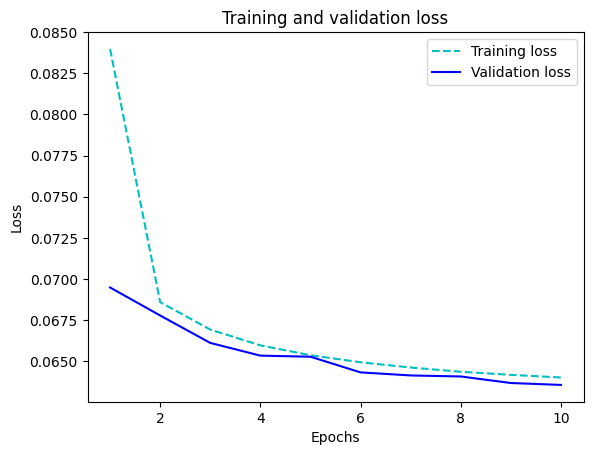

In [15]:
# Visualize loss
viz_loss(his)

### Predicting on Test Datast

In [16]:
# Define visualized image function

def visualize_image(image, row=3, col=10, title='Generated hadwriting digit image'):
    fig, ax = plt.subplots(row,col,figsize=(13,4))
    fig.suptitle(title)
    for i in range(row):
        for j in range(col):
            ax[i,j].imshow(image[j + i*10],cmap='gray')
            ax[i,j].get_xaxis().set_visible(False)
            ax[i,j].get_yaxis().set_visible(False)

In [17]:
# Reconstruct image using test dataset
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


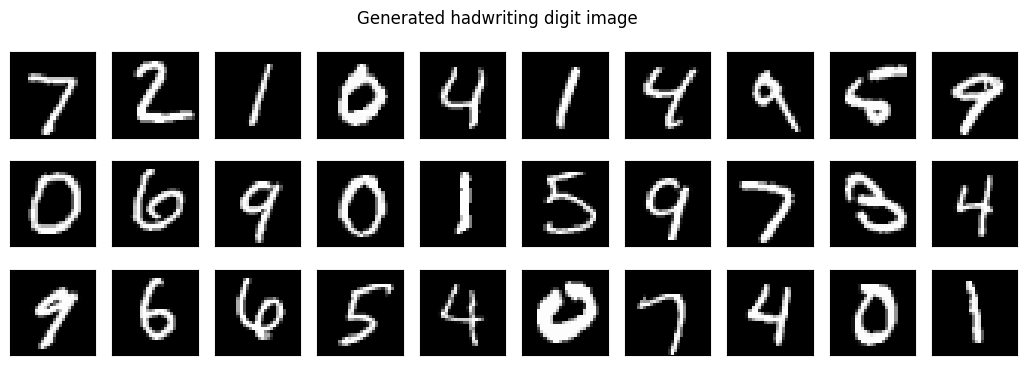

In [18]:
# Show test image

x_test_reshape = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2])
visualize_image(x_test_reshape)

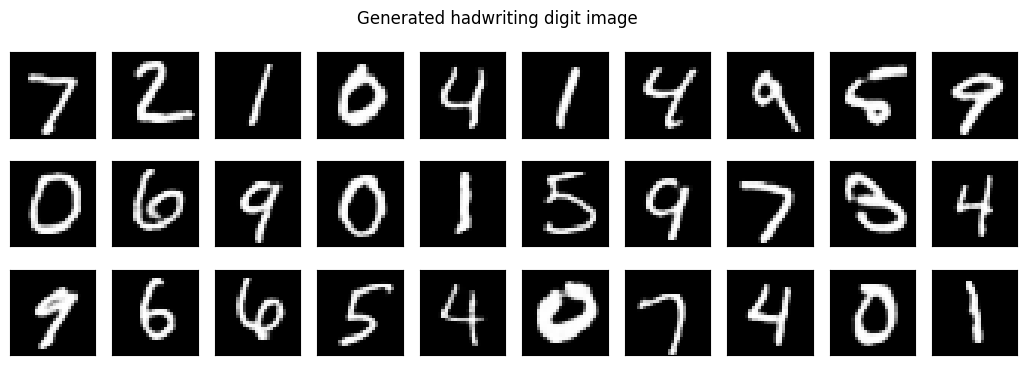

In [19]:
# Show reconstruct image

decoded_imgs = decoded_imgs.reshape(decoded_imgs.shape[0],decoded_imgs.shape[1],decoded_imgs.shape[2])
visualize_image(decoded_imgs)